In [1]:
# Imports

from api import RandomUserAPI
import utilities
import pandas as pd
import numpy as np

**Etapa 1: Entendendo os dados**

Consome a API na URL https://randomuser.me/api/ e retorna um dicionário com os dados

In [2]:
generator = RandomUserAPI()

# excluindo a categoria "login" do resultado
blacklist = ['login']
generator.update_blacklist(["login"])

# obtendo o dicionario
consulta = generator.request(n = 1, as_dataframe=False)
consulta

{'gender': ['male'],
 'name_title': ['Mr'],
 'name_first': ['Marion'],
 'name_last': ['Burke'],
 'location_street_number': [4331],
 'location_street_name': ['Kings Road'],
 'location_city': ['Southampton'],
 'location_state': ['Durham'],
 'location_country': ['United Kingdom'],
 'location_postcode': ['G8 3YJ'],
 'location_coordinates_latitude': ['-7.5780'],
 'location_coordinates_longitude': ['-135.6281'],
 'location_timezone_offset': ['+2:00'],
 'location_timezone_description': ['Kaliningrad, South Africa'],
 'email': ['marion.burke@example.com'],
 'dob_date': ['1962-08-15T20:01:52.395Z'],
 'dob_age': [60],
 'registered_date': ['2003-12-28T00:27:41.810Z'],
 'registered_age': [18],
 'phone': ['015396 62757'],
 'cell': ['07439 588920'],
 'id_name': ['NINO'],
 'id_value': ['YL 47 49 83 O'],
 'picture_large': ['https://randomuser.me/api/portraits/men/18.jpg'],
 'picture_medium': ['https://randomuser.me/api/portraits/med/men/18.jpg'],
 'picture_thumbnail': ['https://randomuser.me/api/portr

**Etapa 2: Coletando dados**

Coleta uma quantidade N de dados da API, manipula para montar um pandas.DataFrame e salva o resultado em um arquivo CSV.

In [3]:
# Gera um DataFrame com a consulta
consulta2 = generator.request(n = 500, as_dataframe=True)
consulta2
consulta2.head(10) # Visualiza os 10 primeiros

,gender,name_title,name_first,name_last,location_street_number,location_street_name,location_city,location_state,location_country,location_postcode,...,registered_date,registered_age,phone,cell,id_name,id_value,picture_large,picture_medium,picture_thumbnail,nat
0,male,Mr,Lenni,Koskinen,4377,Reijolankatu,Malax,South Karelia,Finland,54399,...,2007-10-28T00:10:14.425Z,15,08-464-221,045-473-05-96,HETU,NaNNA991undefined,https://randomuser.me/api/portraits/men/16.jpg,https://randomuser.me/api/portraits/med/men/16...,https://randomuser.me/api/portraits/thumb/men/...,FI
1,female,Ms,Marice,Rodrigues,8253,Rua Das Flores,Porto Velho,Rondônia,Brazil,26186,...,2006-06-24T07:08:35.868Z,16,(34) 1129-4364,(32) 0633-2716,CPF,904.435.882-25,https://randomuser.me/api/portraits/women/5.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,BR
2,female,Mrs,Almuth,Hering,6120,Kirchweg,Klötze,Nordrhein-Westfalen,Germany,90532,...,2007-10-21T16:36:57.064Z,15,0690-9816291,0173-1084303,SVNR,74 171093 H 752,https://randomuser.me/api/portraits/women/86.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,DE
3,female,Miss,Aria,Willemen,4383,Haereweg,Grathem,Overijssel,Netherlands,7540 HO,...,2013-08-14T06:45:30.891Z,9,(0749) 331000,(06) 47645593,BSN,18108556,https://randomuser.me/api/portraits/women/26.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,NL
4,female,Mrs,رها,پارسا,69,میدان شهیدان رحیمی,بابل,تهران,Iran,77125,...,2004-12-28T15:38:48.178Z,17,056-38248536,0916-328-5680,,None,https://randomuser.me/api/portraits/women/17.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,IR
5,male,Mr,Krasun,Salenko,157,Pionerska,Bolehiv,Ternopilska,Ukraine,83463,...,2003-02-26T01:58:07.920Z,19,(097) R69-7757,(096) Q65-3039,,None,https://randomuser.me/api/portraits/men/19.jpg,https://randomuser.me/api/portraits/med/men/19...,https://randomuser.me/api/portraits/thumb/men/...,UA
6,male,Mr,Hemang,Gupta,1847,Hazratganj,Kolkata,Odisha,India,41079,...,2012-12-24T00:56:24.095Z,9,7477322159,8017430912,UIDAI,170329494216,https://randomuser.me/api/portraits/men/23.jpg,https://randomuser.me/api/portraits/med/men/23...,https://randomuser.me/api/portraits/thumb/men/...,IN
7,male,Mr,Onni,Rantanen,2421,Siilitie,Kinnula,Tavastia Proper,Finland,21065,...,2014-04-11T08:16:17.386Z,8,05-509-721,047-368-16-32,HETU,NaNNA995undefined,https://randomuser.me/api/portraits/men/40.jpg,https://randomuser.me/api/portraits/med/men/40...,https://randomuser.me/api/portraits/thumb/men/...,FI
8,female,Ms,Manuela,Herrera,1124,Ronda de Toledo,Palma de Mallorca,Asturias,Spain,84675,...,2007-08-30T04:37:58.171Z,15,946-216-822,671-887-756,DNI,95952519-J,https://randomuser.me/api/portraits/women/27.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,ES
9,female,Ms,Simona,Åsen,3493,Amagerveien,Østenstad,Hedmark,Norway,0304,...,2013-05-22T23:20:57.356Z,9,25086063,44767108,FN,24027510457,https://randomuser.me/api/portraits/women/89.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,NO


In [4]:
# Salva as informacoes em um arquivo csv localizado na mesma pasta do Notebook
destino = "consulta_RandomUserAPI.csv"
consulta2.to_csv(destino, index = False)

**Etapa 3: Manipulando dados**

Converte a formatacao nacional dos contatos fornecidos para um único formato em comum.
Foramto escolhido foi o E164, composto por:

    +(Country Code) (Area Code) (Subscriber Code)

    Exemplo: +55 21 12345678

In [5]:
formatado = utilities.format_phonenumber(consulta2)
colunas = ["gender", "name_first", "location_country", "cell", "phone", "nat"]

formatado[colunas]

,gender,name_first,location_country,cell,phone,nat
0,male,Lenni,Finland,+358 45 4730596,+358 8 464221,FI
1,female,Marice,Brazil,+55 32 06332716,+55 34 11294364,BR
2,female,Almuth,Germany,+49 173 1084303,+49 690 9816291,DE
3,female,Aria,Netherlands,+31 6 47645593,+31 74 331000,NL
4,female,رها,Iran,+98 916 3285680,+98 56 38248536,IR
...,...,...,...,...,...,...
495,female,Sophie,Canada,+1 A92 O674064,+1 M65 P225390,CA
496,female,Debra,Ireland,+353 81 7941570,+353 61 6666556,IE
497,female,Guro,Norway,+47 95639809,+47 64052042,NO
498,female,Hailey,Canada,+1 F05 K251021,+1 I20 F845394,CA


**Etapa 4: Analisando dados sem agrupamento**

Uma função que recebe, como parâmetro, um pandas.DataFrame e gera dois arquivos: um relatório em texto e outro contendo um gráfico de distribuição da idade dos usuários.

In [6]:
# Gera e salva um relatorio em um arquivo txt
destino = "relatorio.txt"
utilities.relatorio(df = formatado, fname = destino)

# Lendo o relatorio salvo
with open(destino, 'r') as textfile:
    linhas = textfile.readlines()
    print(*linhas)


 ----------------------------------------------------------------------
 INFORMAÇÕES GERAIS
 ----------------------------------------------------------------------
 
 Random User Generator API v1.4
 Usuarios na amostra = 500
 Data & Hora: 14/11/2022 00:02
 
 ----------------------------------------------------------------------
 RELATÓRIO
 ----------------------------------------------------------------------
 
 Ao todo, 53.20% da amostra é composta por usuários do sexo masculino
 enquanto os 46.80% restantes são compostos por usuários do sexo feminino.
 
 A distribuicao de usuários por país é a que segue:
 Australia            -> 4.40%
 Brazil               -> 5.40%
 Canada               -> 6.20%
 Denmark              -> 4.60%
 Finland              -> 6.00%
 France               -> 3.60%
 Germany              -> 4.40%
 India                -> 4.20%
 Iran                 -> 5.40%
 Ireland              -> 5.20%
 Mexico               -> 4.60%
 Netherlands          -> 4.60%
 New Zealand 

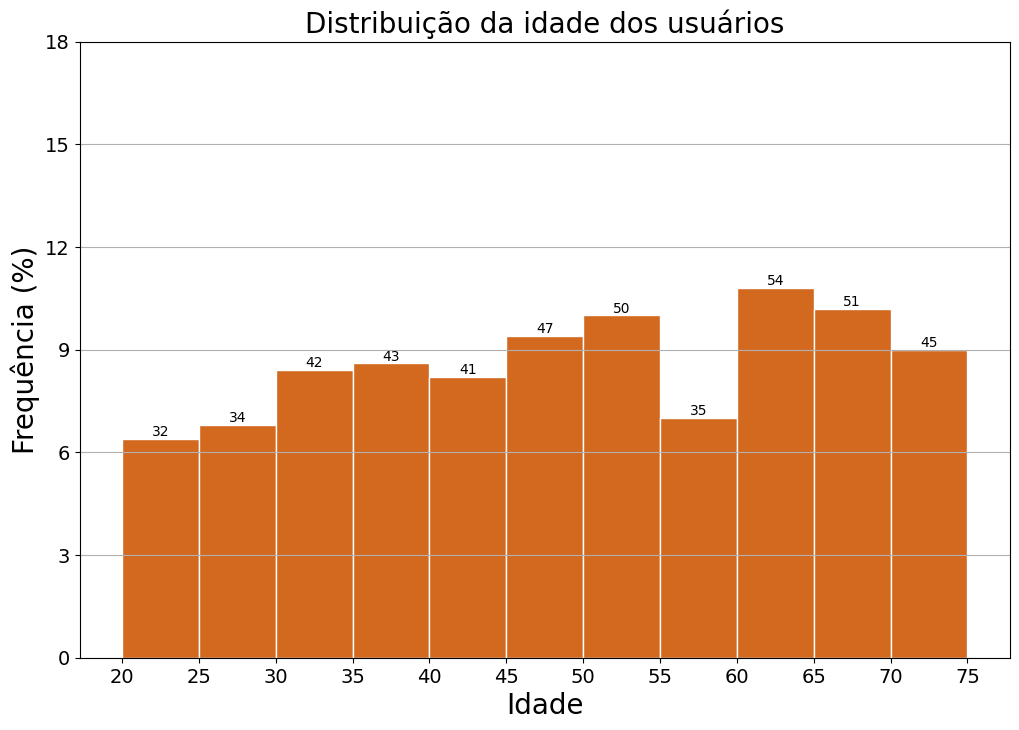

In [7]:
# Gerando uma figura com a distribuicao de usuarios por idade
destino = "Distribuicao por idade.png" # nome da figura a ser salva
utilities.age_histogram(df = formatado, fname = destino, dx = 5)

**Etapa 5: Analisando dados com agrupamento**

uma função que recebe, como parâmetro, um pandas.DataFrame e retorna um pandas.DataFrame com as mesmas colunas, mas com os dados agrupados por país e estado.

In [8]:
# Agrupa e retorna um DataFrame com a quantidade de usuários por grupo e 
# uma nova coluna com uma "lista" contendo a referencia para cada usuario.
# a referencia é o índice de cada linha do DataFrame original

agrupado = utilities.groupby_country_state(formatado)
agrupado # Padrao é ordenar em ordem decrescente pelo "user_count"

,location_country,location_state,user_count,users
42,Denmark,Hovedstaden,7,"[91, 144, 157, 184, 337, 360, 429]"
163,Netherlands,Flevoland,7,"[149, 166, 209, 229, 345, 416, 432]"
43,Denmark,Midtjylland,6,"[36, 38, 83, 385, 393, 450]"
170,Netherlands,Zeeland,6,"[212, 280, 408, 414, 453, 458]"
28,Canada,Alberta,5,"[260, 289, 295, 348, 498]"
...,...,...,...,...
63,France,Ain,1,[47]
62,Finland,Uusimaa,1,[452]
174,New Zealand,Gisborne,1,[50]
175,New Zealand,Hawke'S Bay,1,[257]


In [9]:
# Exemplo de aplicação -> Encontrar os usuarios que moram no país/estado
# com maior número de usuários registrados

# o DataFrame ja esta ordenado em ordem decrescente 
busca = formatado.iloc[agrupado["users"].iloc[0]]
busca

,gender,name_title,name_first,name_last,location_street_number,location_street_name,location_city,location_state,location_country,location_postcode,...,registered_age,phone,cell,id_name,id_value,picture_large,picture_medium,picture_thumbnail,nat,user_id
91,male,Mr,Elias,Kristensen,8448,Thistedvej,Hurup Thy,Hovedstaden,Denmark,57449,...,17,+45 02588523,+45 35720865,CPR,030999-1342,https://randomuser.me/api/portraits/men/83.jpg,https://randomuser.me/api/portraits/med/men/83...,https://randomuser.me/api/portraits/thumb/men/...,DK,91
144,female,Miss,Lærke,Møller,8844,Primulavej,København Sv,Hovedstaden,Denmark,14048,...,8,+45 89984913,+45 64399898,CPR,290991-6225,https://randomuser.me/api/portraits/women/7.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,DK,144
157,male,Mr,Jonathan,Petersen,1861,Bøgeparken,Skaerbaek,Hovedstaden,Denmark,77493,...,20,+45 48947518,+45 68382036,CPR,020995-5703,https://randomuser.me/api/portraits/men/38.jpg,https://randomuser.me/api/portraits/med/men/38...,https://randomuser.me/api/portraits/thumb/men/...,DK,157
184,male,Mr,Alexander,Thomsen,5046,Solbakkevej,Askeby,Hovedstaden,Denmark,12840,...,3,+45 55729760,+45 24349745,CPR,120780-6816,https://randomuser.me/api/portraits/men/33.jpg,https://randomuser.me/api/portraits/med/men/33...,https://randomuser.me/api/portraits/thumb/men/...,DK,184
337,female,Miss,Johanne,Christensen,4703,Aastrupvej,Kvistgaard,Hovedstaden,Denmark,58443,...,19,+45 62815741,+45 19684857,CPR,130680-1929,https://randomuser.me/api/portraits/women/7.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,DK,337
360,female,Miss,Maria,Petersen,1545,Søndergårds Haver,Viby Sj.,Hovedstaden,Denmark,11423,...,10,+45 73568792,+45 40847832,CPR,211260-2876,https://randomuser.me/api/portraits/women/26.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,DK,360
429,female,Miss,Sara,Mortensen,5053,Dådyrvej,Aarhus N,Hovedstaden,Denmark,79980,...,16,+45 69759747,+45 74189789,CPR,161082-2944,https://randomuser.me/api/portraits/women/44.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...,DK,429
